In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
%matplotlib inline

In [2]:
%pwd

'C:\\Users\\Shilin\\Documents\\mufg\\EW'

In [3]:
dfUse=pd.read_excel("dfUse.xlsx")

In [9]:
dfUse.columns

Index([                        'Index_Col',
                              'As of Date',
                        'BTM Borrower Rtg',
                              'BTM Rating',
                   'downgrade forward all',
                 'Downgrade forward notch',
                         'CDL Customer ID',
                          'Cust Regist Nm',
                                'Division',
                                'Exposure',
                 'EDF Implied BTMU Rating',
                               'EDF Notch',
                               'EDF Value',
          'Notch Diff EDF Implied vs BTMU',
                'Secondary Loan Avg Price',
                 'CDS Implied BTMU Rating',
                        'CDS Spread (5yr)',
          'Notch Diff CDS Implied vs BTMU',
              'Moodys Implied BTMU Rating',
                        'Moodys LT Rating',
       'Notch Diff Moodys Implied vs BTMU',
                 'S&P Implied BTMU Rating',
                           'S&P 

In [15]:
dfUseSub=dfUse.loc[:,'Index_Col':'CDS_Change']

In [16]:
from sklearn.cross_validation import train_test_split

C:\Users\Shilin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
Y=dfUseSub['downgrade forward all']

In [22]:
Y.value_counts()

0    8941
1     814
Name: downgrade forward all, dtype: int64

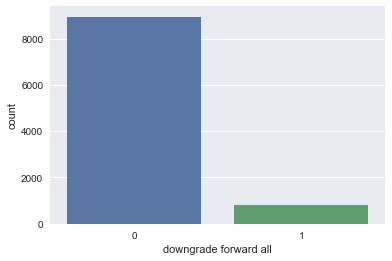

In [24]:
sns.countplot(x='downgrade forward all',data=dfUseSub)

In [25]:
count_0 = len(dfUseSub[dfUseSub['downgrade forward all']==0])
count_1 = len([dfUseSub['downgrade forward all']==1])
pct_of_0 = count_0/(count_0+count_1)
print("percentage of no downgrade is", pct_of_0*100)
pct_of_1 = count_1/(count_0+count_1)
print("percentage of downgrade is", pct_of_1*100)

percentage of no downgrade is 99.98881681950347
percentage of downgrade is 0.011183180496533213


In [29]:
dfUseSub.groupby('downgrade forward all').mean().loc[:,'Exposure':'CDS_Change']

,Exposure,EDF Implied BTMU Rating,EDF Notch,EDF Value,Notch Diff EDF Implied vs BTMU,Secondary Loan Avg Price,CDS Implied BTMU Rating,CDS Spread (5yr),Notch Diff CDS Implied vs BTMU,Moodys Implied BTMU Rating,Moodys LT Rating,Notch Diff Moodys Implied vs BTMU,S&P Implied BTMU Rating,S&P LT Rating,Moody's Id,SP_Change,Moodys_Change,EDF_Change,CDS_Change
downgrade forward all,,,,,,,,,,,,,,,,,,,
0,8.760096e+07,3.613936,3.753874,0.456383,-1.018023,98.759793,2.975807,106.459005,-1.564676,3.081026,5.745555,-1.339669,2.974471,5.635432,3.972651e+08,1.092437,1.058824,1.318032,1.045769
1,8.847430e+07,4.120026,4.573298,1.533877,-0.735602,94.333153,4.084231,325.361215,-0.780769,3.840033,6.019518,-1.234219,3.612783,5.482283,3.860124e+08,1.106383,1.207547,1.338462,1.132653


### Balance the data first

In [71]:
dfUseSubsetno=dfUseSub[dfUseSub['downgrade forward all']==0].sample(814,random_state=1)

In [72]:
dfUseSubsetyes=dfUseSub[dfUseSub['downgrade forward all']==1]

In [78]:
dfUseSubset=pd.concat([dfUseSubsetno,dfUseSubsetyes],axis=0)

In [80]:
dfUseSubset

,Index_Col,As of Date,BTM Borrower Rtg,BTM Rating,downgrade forward all,Downgrade forward notch,CDL Customer ID,Cust Regist Nm,Division,Exposure,...,Moodys LT Rating,Notch Diff Moodys Implied vs BTMU,S&P Implied BTMU Rating,S&P LT Rating,Moody's Id,BIR,SP_Change,Moodys_Change,EDF_Change,CDS_Change
268,4557,2018-07-31,32,3.2,0,0.0,120212,"WILLIAMS-SONOMA, INC.",USCBD,9.500000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4569,74363,2017-04-28,81,8.1,0,0.0,62298,"NATIONAL OILWELL VARCO, INC.",USCBD,3.080000e+08,...,7.75,-7.0,3.1,7.428571,NaN,NaN,NaN,NaN,1.0,NaN
3130,53478,2016-03-31,51,5.1,0,0.0,38895,"CENTURYLINK, INC.",USCBD,9.925000e+07,...,7.75,0.0,5.1,3.571429,159500.0,B1,NaN,1.0,2.0,NaN
6572,103253,2018-07-31,52,5.2,0,0.0,8112,TENNECO INC.,USCBD,3.873087e+07,...,7.75,0.0,5.1,3.571429,600021341.0,B1,NaN,NaN,1.0,NaN
4382,71443,2015-10-30,51,5.1,0,0.0,61281,HCA INC.,USCBD,9.400000e+07,...,3.70,2.0,5.1,3.571429,NaN,NaN,NaN,NaN,1.0,NaN
1501,26440,2017-06-30,4,4.0,0,0.0,144434,VERESEN INC.,Canada,3.855942e+07,...,NaN,NaN,3.2,7.428571,NaN,NaN,NaN,NaN,1.0,NaN
5899,94083,2018-02-28,31,3.1,0,0.0,68407,PIONEER NATURAL RESOURCES COMPANY,USCBD,8.500000e+07,...,7.75,0.0,3.2,7.428571,600037555.0,Baa2,NaN,NaN,1.0,NaN
7460,117629,2015-08-31,81,8.1,0,0.0,87300,"SUMMIT-AGRO ARGENTINA, S.A.",Latin,1.646209e+06,...,3.70,-8.0,2.3,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2653,45948,2017-01-31,21,2.1,0,0.0,31480,"CISCO SYSTEMS, INC.",USCBD,1.175000e+08,...,2.80,0.0,1.0,3.571429,600017852.0,Aa3,NaN,NaN,2.0,NaN
9233,146454,2017-12-29,4,4.0,0,0.0,95937,ENGIE BRASIL ENERGIA S.A.,Latin,2.373283e+07,...,3.25,-2.0,2.2,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### visualization

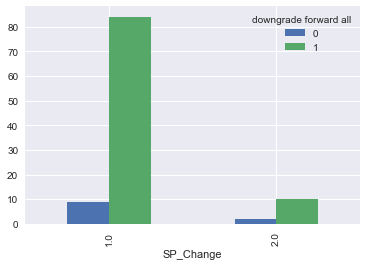

In [81]:
pd.crosstab(dfUseSubset['SP_Change'],dfUseSubset['downgrade forward all']).plot(kind='bar')

In [33]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()

In [82]:
X=dfUseSubset.loc[:,'SP_Change':'CDS_Change']

In [87]:
Y=dfUseSubset['downgrade forward all']

In [88]:
X.fillna(0,inplace=True)

In [89]:
X

,SP_Change,Moodys_Change,EDF_Change,CDS_Change
268,0.0,0.0,1.0,0.0
4569,0.0,0.0,1.0,0.0
3130,0.0,1.0,2.0,0.0
6572,0.0,0.0,1.0,0.0
4382,0.0,0.0,1.0,0.0
1501,0.0,0.0,1.0,0.0
5899,0.0,0.0,1.0,0.0
7460,0.0,0.0,1.0,0.0
2653,0.0,0.0,2.0,0.0
9233,0.0,0.0,0.0,1.0


In [ ]:
### random guessing  always says no downgrade

##Think about business importance. 
#If we are developing a system that detects downgrade, it is desirable that we have a very high recall
# most of the fraudulent transactions are identified, probably at loss of precision, since it is very important that all fraud is identified or at least suspicions are raised.
#precision: 在对的当中有多少是真正对的

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [92]:
 from sklearn.naive_bayes import GaussianNB

In [93]:
gnb = GaussianNB()

In [94]:
Y_pred = gnb.fit(X_train,y_train).predict(X_test)

In [95]:
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [96]:
print("Number of mislabeled points out of a total %d points : %d" % (len(Y_pred),(y_test != Y_pred).sum()))

Number of mislabeled points out of a total 326 points : 139


In [97]:
from sklearn.metrics import recall_score, accuracy_score, precision_score

In [98]:
accuracy_score(y_test, Y_pred)   ##the proportion of correct results that a classifier achieved    slightly better than random guessing

0.57361963190184051

In [99]:
recall_score(y_test, Y_pred)  ##miss much 

0.16455696202531644

In [100]:
precision_score(y_test, Y_pred)  ##the one predicted are relatively accurate

0.78787878787878785

### logistic regression

In [101]:
logistic = linear_model.LogisticRegression()

In [103]:
y_pred_log = logistic.fit(X_train, y_train).predict(X_test)
print (y_pred_log)

[0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0
 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0]


In [105]:
print("Number of mislabeled points from logistic regression out of a total %d points : %d" % (len(y_pred_log),(y_test != y_pred_log).sum()))

Number of mislabeled points from logistic regression out of a total 326 points : 144


In [106]:
accuracy_score(y_test, y_pred_log) 

0.55828220858895705

In [107]:
recall_score(y_test, y_pred_log)

0.36708860759493672

In [108]:
precision_score(y_test, y_pred_log) 

0.56862745098039214

### linear regression

In [137]:

from sklearn.linear_model import LinearRegression

In [138]:
reg=linear_model.LinearRegression()

In [139]:
Y2=dfUseSubset['Downgrade forward notch']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, Y2, test_size=0.2, random_state=42)

In [136]:
pd.DataFrame[Y2,X].describe()

TypeError: 'type' object is not subscriptable

In [141]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [143]:
reg.score(X_train, y_train)

0.098489087777344442

In [144]:
 reg.coef_

array([ 0.2451302 ,  0.64190858, -0.00082618,  0.07450273])

In [145]:
Y_predict=reg.predict(X_test)

In [146]:
Y_predict

array([ 0.43270668,  0.43270668,  1.07544144,  0.5080356 ,  0.43270668,
        0.5080356 ,  0.43270668,  0.67866306,  0.43270668,  0.5080356 ,
        0.4318805 ,  0.43270668,  0.43270668,  0.43270668,  0.5080356 ,
        0.4318805 ,  0.43270668,  0.43105432,  0.43270668,  0.5080356 ,
        2.35925861,  0.43270668,  0.5080356 ,  0.43270668,  1.07544144,
        0.4318805 ,  1.07544144,  0.5080356 ,  0.43270668,  0.5080356 ,
        1.07213672,  0.5080356 ,  0.4318805 ,  0.5080356 ,  0.43270668,
        0.43270668,  0.43270668,  0.43270668,  0.43270668,  0.5080356 ,
        0.5080356 ,  0.43270668,  0.43270668,  0.58253833,  0.43270668,
        0.43270668,  0.5080356 ,  1.32057164,  0.5080356 ,  0.43270668,
        0.43270668,  1.71735002,  0.5080356 ,  0.43270668,  0.43270668,
        0.43270668,  0.50720942,  0.43270668,  0.43270668,  0.43270668,
        0.43270668,  0.4318805 ,  0.43022814,  0.43270668,  0.67866306,
        0.5080356 ,  1.71735002,  0.43270668,  0.5080356 ,  0.43

In [148]:
y_test

15      0.1
4874    1.1
7713    1.0
5280    2.2
5379    0.0
3501    0.8
989     0.0
846     0.1
8855    0.1
3511    0.0
9396    0.1
7178    0.0
926     0.0
9199    1.1
8571    0.9
6566    1.1
2648    0.0
7837    0.0
1660    0.0
2759    0.0
9145    0.0
6381    0.9
5356    1.8
642     0.0
4195    1.2
8722    0.0
6385    0.0
1730    0.0
6543    1.1
2197    0.0
       ... 
6031    0.1
2002    0.0
3115    0.0
3661    0.0
7305    0.1
7135    1.1
2978    0.0
838     0.0
9097    0.9
1822    0.0
443     0.0
4600    0.0
4676    1.1
2473    0.0
7540    1.8
5952    0.1
6429    0.0
3692    0.0
8705    0.0
7517    0.0
2644    0.0
335     3.1
2580    4.1
7974    1.1
766     1.1
5003    0.0
2618    1.0
697     1.0
828     0.9
3891    1.0
Name: Downgrade forward notch, Length: 326, dtype: float64

In [149]:
np.mean((Y_predict-y_test)**2)    ##mean square error

0.5862014691570056